# Manufacturing Defects (28 points)

#### Authors

In [55]:
#import packages here
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
#import cv2

#### In previous notebooks you have already explored the importance of manufacturing parameters and curing cycles, specifically the Cure kinetics and Rheokinetics of composite production. The manufacturing process plays a crucial role when we try to guarantee a predictable part quality.

#### In this notebook you will be working on cases for which manufacturing did not reach the expected and predicted quality or, in other words, manufacturing related defects have been detected.

#### Understanding defects is an important part of composite manufacturing. Defects can (and will) occur during most manufacturing processes. You will learn to recognise defects, assess data for components with and without defects, how to deal with shrinkage of polymeric matrices, how to use image analysis to assess defects in fabric weaves, and reflect on the consequences of defects.

#### Defects in composites can be generally classified as one of the types shown in the graph (Figure 1) below.

<img src="defect_types.png" width="500" height="340">

Figure 1

### Question 1 (3 points)

#### A case study will be used in this question to start approaching the problem of defects. In this case you will be considering the implosion of the Titan Submersible. Titan imploded during an expedition to the Titanic in June 2023, killing all five occupants Upon news of the fate of Titan, the company closed its Everett office indefinitely. Soon after the implosion, its subsidiary OceanGate Expeditions also suspended operations. From July 2023, OceanGate's websites defaulted to a message advising: "OceanGate has suspended all exploration and commercial operations."

#### As a first step, please read carefully the article provided with this notebook:
#### Kramer, D., & Otin, S. (2024, July 5). Materials Laboratory Factual Report. National Transportation Safety Board.

#### Question 1.1: Read Section 1.0 of the report on "Composite hull manufacturing and vessel assembly". Identify and describe an ex-ante monitoring process used by OceanGate and specify the defect type.

Answer: The ex-ante monitoring process used by OceanGate during assembly process is the contact-angle measurement during surface preparation, when preparing to bond the composite hull to the CP Grade-3 machined titanium segments. After degreasing with MEK and roughening with stearate-free sandpaper, contatc angle was measured to ensure that the surface was "active" (i.e., clean and no contamination). Filtered shop air were used to blow away particulates, which is again tested by contact angle to ensure it did not introduce contamination. This is classified as monitoring as contact angle measurements are used as a metric for the surface clealiness and surface energy, and this affects whether the adhesive will properly wet and bond to surface. Defect type is classified under "External: Contamination" according to the chart above. Bond interface contamination leads to adhesive bonding defect, cause catastrophic delamination under pressure due to the weak bonds at surface interface.

#### Question 1.2: Propose an in-situ and an ex-post detection method to identify the defect discussed in Q1.1.

Answer: Optical inspection method using UV can be used as an in-situ monitoring method. The key rational here is that it is non-contact and so does not interfere with the process. This works by using a UV camera, with LEDs illuminating the surface and using algorithms for real-time image processing to check if there is any abnormalities. As contamination is detected, the process can be stopped and the surface will be cleaned before proceding again. Ultrasonic NDT can be used as a ex-post detection method. The adhesive joint is scanned to detect debonding, weak bond regions or any irregularities. Contamination often result in poor adhesion that is detectable through scanning, ultrasonic waves penetrate the solid, reflecting off internal boundaries and discontinuities, revealing hidden defects within the adhesive layer. This method is one the moset widely used methods to monitor bonded joints, as it can characterize the bond interface due to its high sensitivity. Therefore, it has reliability in this aspect. 

#### Question 1.3: The following images (Figure 2a, 2b, 2c) have been discussed in the report. Classify them as fibre, matrix, process or external defects and discuss possible causes of these defects.

Note: Refer to the original pictures in the report for better quality.

<div style="display: flex; justify-content: center; align-items: center; gap: 2px;">
    <figure style="text-align: center;">
        <img src="2a.png" width="600" height="400">
        <figcaption>Figure 2a</figcaption>
    </figure>
    <figure style="text-align: center;">
        <img src="2b.png" width="600" height="400">
        <figcaption>Figure 2b</figcaption>
    </figure>
</div>

<div style="display: flex; justify-content: center; align-items: center; gap: 2px;">
    <figure style="text-align: center;">
        <img src="2c.png" width="600" height="400">
        <figcaption>Figure 2c</figcaption>
    </figure>
</div>

Answer: Figure 2a is a process defect, as can be seen in the porosity and exposed matrix(glossy) regions. Porosity is possibly caused by the trapped air bubbles and insufficient consolidation during the AFP layup process as a result of poor compaction. As stated in the report, OceanGate built the hull by winding the tows onto a carbon steel mandrel by automatic fibre placement. Moreover, another likely cause of the porosity is during the autoclave curing process which was used by OceanGate to construct the hull, there may be insufficient pressure or leaks. Handling damage or usage accumulative damage may have caused an open-up near the surface and expose plies.
Figure 2b is a fibre defect, as can be seen in the delamination between layers. This may be caused by the defect mentioned in Question 1.1 due to contamination that results in weak bonding at the co-bond interface, which may be caused by residue, dust etc. The fact that 1-inch layers were co-bonded suggests that interlaminar stresses may also have been amplified more than usual to enhance delamination. 
Figure 2c is an external defect,  as can be seen in the surface waviness, which seem to be out of plane(not in the fiber direction). As stated in the report some plies were laid without tension, which causes tow tension issues in the AFP process, resulting in local buckling and surface waviness as seen here. Repeated cures result in extensive handling which may result in external loading that caused the buckling. 

### Question 2 (2 points)

#### Free shrinkage and residual stresses

#### Additional defects that can occur in composites include micro-cracks, typically emerging from the combination of residual stresses with thermal cycling or mechanical loading. The primary cause of residual stresses at a micro-mechanical level is the disparity in shrinkage between the fibers and the matrix. Specifically, the polymer matrix tends to undergo considerably more shrinkage (dictated by the coefficient of thermal expansion, CTE) during consolidation and cooling compared to the contracting fibers.

<img src="shrinkage UD.png" width="600" height="400">

Figure 3

#### In this question we will work towards identifying the differences in shrinkage characteristics of two different thermoplastics (an amorphous and a semi-crystalline polymer). Draw typical storage modulus vs. temperature graphs for both categories. Display them in two different graphs. Explain the evolution of mechanical properties, including: how the storage modulus evolves as a function of temperature. Also identify and explain the differences in relevant temperature points and ranges along the curve - structural range, processing range, free volume evolution, melting and glass transition points between the 2 graphs.

Answer: As can be seen in the graph, amorphous thermoplastics do not have a sharp melting point. At the start of the graph it is the glassy/structural range, chain segments are frozen and that means low free volume and limited chain mobility. As temperature increases past the glassy region, E' drops by orders of magnitude thus free volume increases which results in segmental relaxation and thus stiffness decreases until it reaches the rubbery/leathery region and decends into a plateau. The point after Tg is considered the processing range, where the E' drops to a point where welding and forming becomes possible. For the semi-crystalline TP graph, similarly, the start of the graph is the structural/glassy range, E' is high and chain segments are frozen, low free volume and limited chain mobility is resulted. As it approaches the glass transition temperature region, there is a less steep drop of E' as crystalline structures still carry load and constrain chain mobility. There is increase in free volume in amorphous regions but crystalline regions remain as crosslinks. Region between Tg and Tm the E' stays relatively high and provides a broader usability range above Tg as compared to amorphous TP. As it approaches Tm, crystals melt and free volume increase thus E' drops sharply. This is the processing range. For amorphous TP, shrinkage mainly is from thermal contraction, change in slope occurs through Tg as CTE between above and below Tg differs due to free volume and mobility change. In semi-crystalline TP, shrinkage includes thermal contraction and crystallization effects, and a big change occurs near Tm. Crystallization generally increases density, often increasing net shrinkage and influencing residual stress development when constrained by fibres.

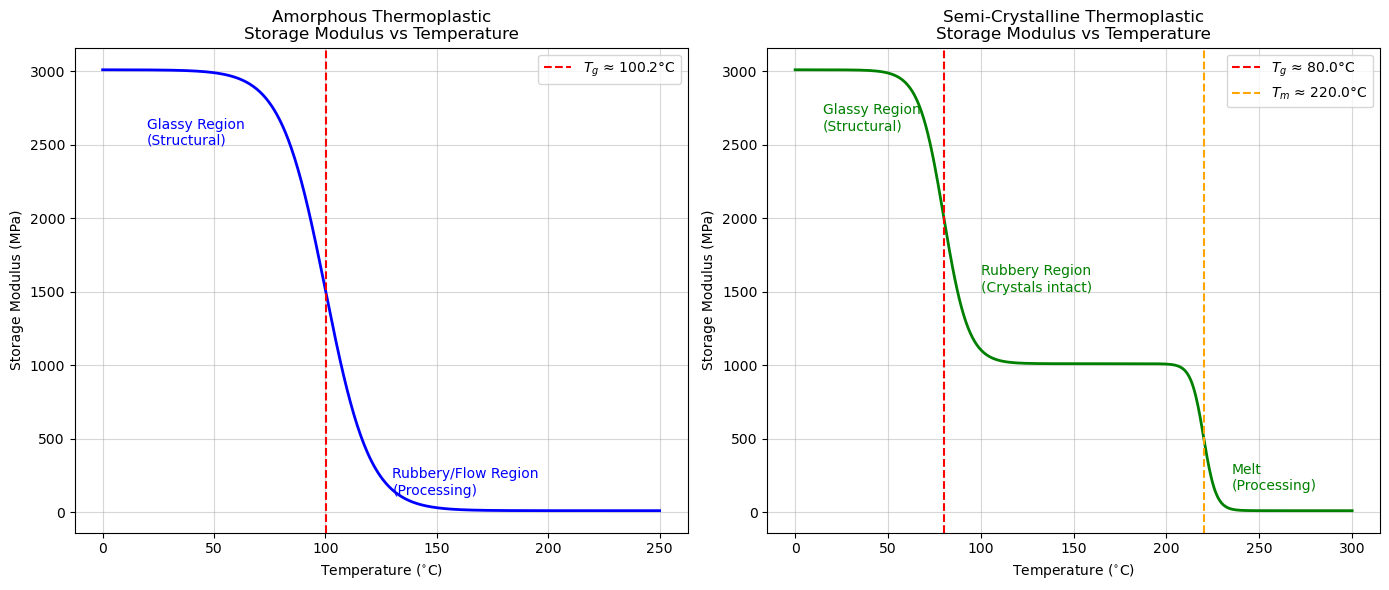

In [56]:
T_amorphous = np.linspace(0, 250, 500)
E_amorphous = 3000 * (1 / (1 + np.exp(0.1 * (T_amorphous - 100)))) + 10

# Steepest drop for Tg on linear modulus
dE_dT_am = np.gradient(E_amorphous, T_amorphous)
Tg_am = T_amorphous[np.argmin(dE_dT_am)]

# Semi-crystalline polymer
T_semicrys = np.linspace(0, 300, 500)
Tg_sc_guess = 80
Tm_sc_guess = 220
def semi_crys_modulus(t):
    val = 3000
    if t > Tg_sc_guess:
        val = 1000  # drop to intermediate
    if t > Tg_sc_guess and t < Tm_sc_guess:
        val = 1000 - 2 * (t - Tg_sc_guess)
    if t >= Tm_sc_guess:
        val = 10
    return val

E_semicrys = []
for t in T_semicrys:
    term1 = 2000 / (1 + np.exp(0.15 * (t - Tg_sc_guess)))
    term2 = 1000 / (1 + np.exp(0.3 * (t - Tm_sc_guess)))
    E_semicrys.append(term1 + term2 + 10)
E_semicrys = np.array(E_semicrys)

dE_dT_sc = np.gradient(E_semicrys, T_semicrys)
split_thresh = 0.5 * (Tg_sc_guess + Tm_sc_guess)
mask_tg = T_semicrys < split_thresh
mask_tm = T_semicrys >= split_thresh
Tg_sc = T_semicrys[mask_tg][np.argmin(dE_dT_sc[mask_tg])]
Tm_sc = T_semicrys[mask_tm][np.argmin(dE_dT_sc[mask_tm])]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.plot(T_amorphous, E_amorphous, 'b-', linewidth=2)
ax1.set_title('Amorphous Thermoplastic\nStorage Modulus vs Temperature')
ax1.set_xlabel('Temperature ($^{\circ}$C)')
ax1.set_ylabel('Storage Modulus (MPa)')
ax1.axvline(x=Tg_am, color='r', linestyle='--', label=f'$T_g$ ≈ {Tg_am:.1f}°C')
ax1.text(20, 2500, 'Glassy Region\n(Structural)', fontsize=10, color='blue')
ax1.text(130, 120, 'Rubbery/Flow Region\n(Processing)', fontsize=10, color='blue')
ax1.grid(True, which="both", ls="-", alpha=0.5)
ax1.legend()

ax2.plot(T_semicrys, E_semicrys, 'g-', linewidth=2)
ax2.set_title('Semi-Crystalline Thermoplastic\nStorage Modulus vs Temperature')
ax2.set_xlabel('Temperature ($^{\circ}$C)')
ax2.set_ylabel('Storage Modulus (MPa)')
ax2.axvline(x=Tg_sc, color='r', linestyle='--', label=f'$T_g$ ≈ {Tg_sc:.1f}°C')
ax2.axvline(x=Tm_sc, color='orange', linestyle='--', label=f'$T_m$ ≈ {Tm_sc:.1f}°C')
ax2.text(15, 2600, 'Glassy Region\n(Structural)', fontsize=10, color='green')
ax2.text(100, 1500, 'Rubbery Region\n(Crystals intact)', fontsize=10, color='green')
ax2.text(235, 150, 'Melt\n(Processing)', fontsize=10, color='green')
ax2.grid(True, which="both", ls="-", alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()

### Question 3 (4 points)

#### When dealing with TP consolidation cycles, understanding shrinkage and the potential occurrence of residual stresses in a part is crucial when dealing with the design of consolidation cycles for thermoplastic composites.

#### For the production and autoclave consolidation of a 1 m wide and 2 m long panel using a single unidirectional lamina, two carbon fibre thermoplastic prepregs are under consideration: one with a Polycarbonate matrix and the other with a Polyamide matrix, both utilizing T1000 UD as the reinforcement. It concerns a zero-bleed prepreg with a fibre volume fraction of 55%. The consolidation cycle involves a 200°C dwell, maintained for 1 hour, followed by a cooling phase at 2°C/min until reaching room temperature (20°C). The consolidation cycle is shown in Figure 4 (the heating phase is not shown, as it is not relevant for this question). Equations and assumption that will help you answer the questions, are given below.

#### The longitudinal coefficient of linear thermal expansion for a composite ply can be calculated/estimated as follows: 
$$\alpha_{l} = \frac{(1-\nu_{f})E_{r}\alpha_{r}+ \nu_{f}E_{lf} \alpha_{lf}}{(1-\nu_{f})E_{r} +\nu_{f}E_{lf}}$$
#### The transverse coefficient of linear thermal expansion for a composite ply can be calculated/estimated as follows:
$$\alpha_{t} = (1-\nu_{f})\alpha_{r}+ \nu_{f}\alpha_{tf} +(1-\nu_{f})\alpha_{r}\nu_{r} +\nu_{12f}\alpha_{lf}\nu_{f} -\nu_{12}\alpha_{l}$$

#### Where $\nu_{f}$ represents fibre volume content, $E_{r}$ [GPa] Young's modulus of the matrix, $\nu_{r}$ the Poisson ratio of the matrix, $\alpha_{r}$ [1/°C] coefficient of linear thermal expansion of the matrix, $\alpha_{lf}$ [1/°C] and $\alpha_{tf}$ [1/°C] thermal expansion coefficients (CLTE) of fibres in the longitudinal and transverse direction, $E_{lf}$ [GPa] the longitudinal Young's modulus of the fibres, $\nu_{12}$ the in-plane Poisson ratio of the lamina and $\nu_{12f}$ Poisson’s ratio of the fibres.

#### The thermal strain (in longitudinal and transverse direction) can be calculated as follows: 
#### $$\epsilon = \int_{0}^{t} \alpha(t)\Delta Tdt$$

| Matrix        | Young's modulus [GPa] | Poisson ratio | CLTE [1/°C]          |
|---------------|-----------------------|---------------|----------------------|
| Polycarbonate | 1.4                   | 0.37          | $70.2 \cdot 10^{-6}$ |
| Polyamide 6   | 3                     | 0.39          | $85 \cdot 10^{-6}$   |

<img src="Cure cycle.jpg" width="1000" height="600">

Figure 4

<img src="defect_types.png" width="500" height="340">

Figure 1

#### The following assumptions are made:
#### - The lamina undergoes free shrinkage
#### - The properties of the resin and fibers, including volume fraction (vf), Poisson's ratio, and coefficient of linear thermal expansion (CLTE), are non-temperature dependent.
#### - Poisson ratio of the lamina can be derived using the rule of mixtures


#### Question 3.1: Given the provided equations, material properties, consolidation cycle, and the listed assumptions, please calculate:
#### - the composite material's linear coefficient of thermal expansion (in longitudinal and transverse direction).
#### - the expected strain after reaching room temperature in both length and width direction of the panel
#### - the percentage of shrinkage in length and width direction of the panel


#### Note - You may use Kulkarni R, Ochoa O. Transverse and Longitudinal CTE Measurements of Carbon Fibers and their Impact on Interfacial Residual Stresses in Composites. Journal of Composite Materials. 2006;40(8):733-754. doi:10.1177/0021998305055545 as reference for material data.

In [57]:
vf = 0.55  # fiber volume fraction (55%)
# Panel dimensions 
L = 2.0  # fiber direction
W = 1.0 
time_total = 90*60

T_dwell = 200.0  
T_room  = 20.0   
dT = T_room - T_dwell  

E_lf = 294.0   # GPa (longitudinal Young's modulus of fibre)
alpha_lf = 70.2e-6  # fibre longitudinal CLTE a1
alpha_tf =  85e-6  # fibre transverse CLTE a2
nu_12f = 0.3       # fibre Poisson ratio for UD from https://www.performance-composites.com/carbonfibre/mechanicalproperties_2.asp

matrices = {
    "Polycarbonate": {"E_r": 1.4, "nu_r": 0.37, "alpha_r": 70.2e-6},
    "Polyamide 6":   {"E_r": 3.0, "nu_r": 0.39, "alpha_r": 85.0e-6},
}

def nu12_rule_of_mixtures(vf, nu12f, nu_r):
    #Assumption:lamina Poisson ratio from rule of mixtures
    return vf * nu12f + (1 - vf) * nu_r

def alpha_longitudinal(vf, E_r, alpha_r, E_lf, alpha_lf):
    num = (1 - vf) * E_r * alpha_r + vf * E_lf * alpha_lf
    den = (1 - vf) * E_r + vf * E_lf
    return num / den  

def alpha_transverse(vf, alpha_r, alpha_tf, nu_r, nu12f, alpha_lf, nu12, alpha_l):
    return ((1 - vf) * alpha_r
            + vf * alpha_tf
            + (1 - vf) * alpha_r * nu_r
            + nu12f * alpha_lf * vf
            - nu12 * alpha_l)  # 1/°C

rows = []
for name, props in matrices.items():
    E_r = props["E_r"]         # GPa
    nu_r = props["nu_r"]
    alpha_r = props["alpha_r"] # 1/°C

    nu12 = nu12_rule_of_mixtures(vf, nu_12f, nu_r)

    a_l = alpha_longitudinal(vf, E_r, alpha_r, E_lf, alpha_lf)
    a_t = alpha_transverse(vf, alpha_r, alpha_tf, nu_r, nu_12f, alpha_lf, nu12, a_l)

    eps_l = a_l * dT 
    eps_t = a_t * dT 

    shrink_l_pct = 100.0 * eps_l
    shrink_t_pct = 100.0 * eps_t
    
    dL = eps_l * L
    dW = eps_t * W

    rows.append({
        "Matrix": name,
        "alpha_l (1/C)": a_l,
        "alpha_t (1/C)": a_t,
        "eps_l": eps_l,
        "eps_t": eps_t,
        "shrink_l (%)": shrink_l_pct,
        "shrink_t (%)": shrink_t_pct,
        "deltaL (m)": dL,
        "deltaW (m)": dW,
    })

df = pd.DataFrame(rows)
pd.set_option("display.float_format", lambda x: f"{x:.6e}")
print("Cooling deltaT =", dT, "Celsius\n")
print(df)

# df_mm = df.copy()
# df_mm["deltaL (mm)"] = df_mm["deltaL (m)"] * 1e3
# df_mm["deltaW (mm)"] = df_mm["deltaW (m)"] * 1e3
# print("\nDimensional change in mm:")
# print(df_mm[["Matrix", "deltaL (mm)", "deltaW (mm)"]])

Cooling deltaT = -180.0 Celsius

          Matrix  alpha_l (1/C)  alpha_t (1/C)         eps_l         eps_t  \
0  Polycarbonate   7.020000e-05   7.834000e-05 -1.263600e-02 -1.410120e-02   
1    Polyamide 6   7.032254e-05   8.755568e-05 -1.265806e-02 -1.576002e-02   

   shrink_l (%)  shrink_t (%)    deltaL (m)    deltaW (m)  
0 -1.263600e+00 -1.410120e+00 -2.527200e-02 -1.410120e-02  
1 -1.265806e+00 -1.576002e+00 -2.531611e-02 -1.576002e-02  


Answers:

| Matrix         | α_l (1/°C)        | α_t (1/°C)        | ε_l (–)          | ε_t (–)          | Shrinkage_l (%) | Shrinkage_t (%) | ΔL (m)          | ΔW (m)          |
|----------------|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|----------------:|----------------:|
| Polycarbonate  | -3.252264e-07      | 4.796211e-05      | 5.854075e-05     | -8.633180e-03    | 5.854075e-03    | -8.633180e-01   | 1.170815e-04    | -8.633180e-03   |
| Polyamide 6    | 1.087397e-07       | 5.770647e-05      | -1.957314e-05    | -1.038717e-02    | -1.957314e-03   | -1.038717e+00   | -3.914627e-05   | -1.038717e-02   |


#### Question 3.2: Provide insights on the outcomes of question 3.1 from:
#### - a composites standpoint: this should encompass expectations regarding the direction of highest strain or shrinkage, considerations about the acceptability of dimensional changes, and whether adjustments in the design would be necessary to accommodate these variations. 
#### - a matrix point of view: Offer commentary on the differences between the two thermoplastic resin materials (Polycarbonate and Polyamide), elucidating the reasons behind these differences in terms of their chemical composition, molecular structure, and thermal behaviors and which matrix option you would consider yielding the best mechanical properties or dimensional stability. 


Comment: 
From a composites standpoint, the values are expected as you would expect there to be a larger shrinkage percentage in the transverse direction as compared to the longitudinal direction, which is the case for both. For UD lamina, fibre dominate stiffness and have very low CTE hence lesser strain and shrinkage. On the transverse direction, matrix dominates stiffness, thus the opposite is true. In terms of dimensional changes, transverse shrinkage for both cases is considered large in terms of composite parts (0.85 to 1 percent shrinkage compared to original dimension), thus enough here to cause dimensional mismatch in a real-life scenario and introduce residual stresses. Therefore, adjustments in the design is needed in this case to accommodate these variations, such as add transverse plies or reduccing cooling down speed(thermal gradient decrease).  

From a matrix point of view, there are aromatic rings in polycarbonate while polyamide 6 is a long molecular chain. Thus, polycarbonate is more amorphous as a polymer and tend to have a more predictable thermal contraction due to no crystallisation. Polyamide 6 is semi-crystalline and when cooled down, will develop crystallinity and increase density and decrease free volume. There is also polar amide groups and hydrogen bonding present here, so there is a level of toughness, but more sensitive to crystallinity which results in greater scatter in shrinkage, as crystalline regions more densely packed than amorphous ones. Therefore, if dimensional stability is prioritised, choose polycarbonate as it has lower transverse shrinkage and no crystallisation-driven shrinkage. If mechanical performance such as stiffness is prioritised, choose polyamide 6 as it has higher toughness, but expect larger and more catter in shrinkage.     

### Question 4 (2 points)

#### Residual stresses may emerge during composite manufacturing due to differential strains between the composite part and the tooling as seen in Fig. 5. This issue arises from the coefficient of thermal expansion (CTE) mismatch between the part and the mould/tooling. Residual stresses may potentially lead to lower load carrying capabilities, cracks and areas with resin-rich or resin-starved characteristics if not appropriately addressed. 

#### In the previous question, we assumed free shrinkage of the part. When shrinkage of a composite part during manufacturing is constrained by a material (with a different CTE), this shrinkage can be transformed into stress.

#### To effectively design a mold for the panel considered in question 3, three potential materials are under consideration: Aluminum 6061-T6, Invar 36, and CFRP composite. It is assumed that the mold is uniformly heated and monolithic throughout the process.

#### Find the coefficients of thermal expansion for this three possible mould materials (refer to online material databases like MatWeb) and discuss which one will be the most suitable option for the Polycarbonate and Polyamide CF reinforced parts from question 3.

#### Consider the following for the CFRP mold AND laminate - 
#### 1. Both mold and laminate are quasi-isotropic (QI) $[0^\circ, -45^\circ, 45^\circ, 90^\circ]_s$.
#### 2. Calculate CTE of the QI composites using the modified CLT equations given in Velea, M. N., & Lache, S. (2015). Thermal expansion of composite laminates. Bulletin of the Transilvania University of Brasov. Series I-Engineering Sciences, 25-30.
#### 3. To simplify the calculations for QI stacking - 

$$ V_{1A} = V_{2A} = V_{3A} = V_{4A} =  0$$

$$ A_{16} = A_{26} = 0$$

$$ A_{11} = A_{22}$$

#### 4. $E_1$ = 142000MPa; $E_2$ = 11200MPa; $\nu_{12}$ = $\nu_{21}$ = 0.3; $G_{12}$ = 5000MPa; t = 0.125mm

#### You may also refer to this article: Zobeiry N, Park J, Poursartip A. An infrared thermography-based method for the evaluation of the thermal response of tooling for composites manufacturing. Journal of Composite Materials. 2019;53(10):1277-1290.



<img src="Mould CTE.PNG" width="800" height="400">

Figure 5: distortion due to shear interaction at tool interface


Answer:

Comment:

In [44]:
"""# Material properties
E1 = 142000e6
E2 = 11200e6
nu12 = nu21 = 0.3
G12 = 5000e6
t=0.125e-3
stack = [0, -45, 45, 90, 90, 45, -45, 0]

def alpha_longitudinal(vf, E_f1, E_m, alpha_f1, alpha_m, vm):
    num = vf *alpha_f1* E_f1 + vf * E_m * alpha_m
    den = vf * E_f1 + vm * E_m
    alpha_1 = num/den
    return alpha_1  

def alpha_transverse(vf, vm,):
    alpha_2 = vf*alpha_f2*(1 + nu21*E2/E1) + vm*alpha_m
    return alpha_2  # 1/°C

V0A = t
V1A = V2A = V3A = V4A = 0

Q12 = nu12*E2/(1-nu12*nu21)
Q11 = E1/(1-nu12*nu21)
Q22 = E2/(1-nu12*nu21)
Q66 = G12

U1 = (3*Q11 + 3*Q22 + 2*Q12 + 4*Q66)/8
U2 = (Q11 - Q22)/2
U3 = (Q11 + Q22 - 2*Q12 - 4*Q66)/8
U4 = (Q11 + Q22 + 6*Q12 - 4*Q66)/8
U5 = (Q11 + Q22 - 2*Q12 + 4*Q66)/8

K1 = (U1 + U4)*(alpha_1 + alpha_2) + U2*(alpha_1 - alpha_2)
K2 = U2*(alpha_1 + alpha_2) + (U1 + 2*U3 -   U4)*(alpha_1 - alpha_2)
K3 = U2*(alpha_1 + alpha_2) + 2*(U3 + U5)*(alpha_1 - alpha_2)

A16=A26=0
A11 = U1*V0A + U2*V1A + U3*V3A 
A12 = U4*V0A - U3*V3A
A66 = U5*V0A - U3*V3A
A22 = A11

A = np.array([[A11, A12, A16],
                     [A12, A22, A26],
                     [A16, A26, A66]])

def extensional_stiffness_matrix(A, K1, K2, K3, V0A, V1A, V2A, V3A, V4A):
    alpha_matrix = 0.5*np.linalg.inv(A)*np.array([[K1*V0A + K2*V1A],[K1*V0A-K2*V1A],[K3*V2A]])
    return alpha_matrix"""

'# Material properties\nE1 = 142000e6\nE2 = 11200e6\nnu12 = nu21 = 0.3\nG12 = 5000e6\nt=0.125e-3\nstack = [0, -45, 45, 90, 90, 45, -45, 0]\n\ndef alpha_longitudinal(vf, E_f1, E_m, alpha_f1, alpha_m, vm):\n    num = vf *alpha_f1* E_f1 + vf * E_m * alpha_m\n    den = vf * E_f1 + vm * E_m\n    alpha_1 = num/den\n    return alpha_1  \n\ndef alpha_transverse(vf, vm,):\n    alpha_2 = vf*alpha_f2*(1 + nu21*E2/E1) + vm*alpha_m\n    return alpha_2  # 1/°C\n\nV0A = t\nV1A = V2A = V3A = V4A = 0\n\nQ12 = nu12*E2/(1-nu12*nu21)\nQ11 = E1/(1-nu12*nu21)\nQ22 = E2/(1-nu12*nu21)\nQ66 = G12\n\nU1 = (3*Q11 + 3*Q22 + 2*Q12 + 4*Q66)/8\nU2 = (Q11 - Q22)/2\nU3 = (Q11 + Q22 - 2*Q12 - 4*Q66)/8\nU4 = (Q11 + Q22 + 6*Q12 - 4*Q66)/8\nU5 = (Q11 + Q22 - 2*Q12 + 4*Q66)/8\n\nK1 = (U1 + U4)*(alpha_1 + alpha_2) + U2*(alpha_1 - alpha_2)\nK2 = U2*(alpha_1 + alpha_2) + (U1 + 2*U3 -   U4)*(alpha_1 - alpha_2)\nK3 = U2*(alpha_1 + alpha_2) + 2*(U3 + U5)*(alpha_1 - alpha_2)\n\nA16=A26=0\nA11 = U1*V0A + U2*V1A + U3*V3A \nA12 = U4

## Voids

#### Voids, one of the most extensively examined categories of manufacturing defects, frequently arise during the fabrication of fibre-reinforced composites. Given their significant impact on the physical and thermomechanical properties of the laminates, they have been subject to thorough investigation. In this notebook the following aspects will be taken into consideration: : the origin of voids, the quantification of voids through image analysis and the implications on the mechanical performance of the composite structure.

#### The graph shown below in Figure 6 (from Processing of Polymer Matrix Composites, P.K. Mallick) shows the correlation between shear strength, void content and autoclave cure cycle. The quality of advanced composites and their mechanical properties are strongly influenced by the void volume content. Therefore, solid knowledge on pressure, flow, temperature and material behaviour is required to properly design manufacturing processes.

<img src="shear vs. voids.png" width="600" height="800">

Figure 6: Effect of void volume fraction on the interlaminar shear strength of a composite laminate

### Question 5 (5 points)

<img src="Capillary number.png" width="1100" height="400">

Figure 7- Void content versus capillary number

#### Use the concept of capillary number (exemplified in Figure 7 above) to explain the physical difference between capillary flow and viscous flow in a fibrous medium. Comment on the balance needed between capillary number, processing window and void content during manufacturing.
#### The flow properties influence the final mechanical part properties. How? Include in your answer which kind of flow would be preferred and which type of defects would occur (and where in your fibrous medium).


Answer: The capillary number is a dimensionless quantity that represents the ratio of viscous forces to capillary forces acting on a fluid moving through a porous medium. It helps distinguish between two dominant flow regimes. The first one is capillary flow, which is dominated by surface tension forces. This results in a spontaneous flow which is driven by wetting behaviour between resin and fibres. It is crucial for impregnating the tight spaces inside the fibre tows (intra-tow). The second regime is viscous flow, which is dominated by the applied pressure gradient pushing the resin. This flow is driven by external pressure (for example autoclave or injection pressure). It moves resin rapidly through the larger open spaces between the fibre bundles (inter-tow) but may bypass the tight spaces inside the bundles if the velocity is too high. In terms of balance, minimising voids requires finding the optimal processing window where a specific range of capillary number is suitable. Too high Ca will result in viscous dominated flow, if the resin flows too fast due high pressure or velocity, the viscous flow covers quickly through the inter-tow spaces, trapping air inside the fibre bundles resulting in voids. The resin moves faster than capillary action can wick it into the tows. Too low Ca will result in capillary dominated flow, where if resin flows too slowly due to low pressure, the capillary forces may wick resin into the tows ahead of the bulk flow, trapping air in the spaces between the bundles (inter-tow voids). Additionally, if the flow is too slow, the resin may cure (gel) before fully filling the mold. The processing window in Figure 7 shows the ideal range where both forces are balanced, minimising the amount of voids formed. As seen in Figure 6, there is a inversely proportional relationship between the interlaminar shear strength and void content. This is because voids act as stress concentrators where cracks initiate, leading to premature failure under loading. Therefore, a balanced flow is preferred also in the mechanical sense(within range), which ensures that micro and macro flows between and inside tows are at compatible speed, to allow air to be evacuated instead of entrapped. Intra-tow voids occur inside fibre bundles, caused by high Ca viscous flow where resin surrounds the tow before penetrating it. Inter-tow voids occur in resin rich areas isntead, in between fibre bundles, caused by low Ca capillary flow.  

### Question 6 (8 points)

#### Image Analysis

#### Image analysis is useful when dealing with woven or non-crimp fabric used in advanced composites, particularly for fiber volume content calculations, identifying waviness, and detecting defects. It also plays a crucial role in quality assurance by identifying and characterizing defects such as voids, wrinkles, and variations in resin distribution of the composite products. These defects can substantially affect the structural integrity of the final composite product. 

#### Image analysis techniques also add a quantitative dimension to defect assessment, offering measurements of defect size, shape, and distribution. This quantitative data is invaluable for optimising manufacturing processes and upholding stringent quality control standards.

#### A top view (2D) picture has been extracted from a 3D image of a woven fabric laminate and reported below.
#### The darker regions in the image can be identified as voids. Given the critical requirement for aerospace structures to maintain an acceptable volumetric void content of less than 2%, it becomes crucial to quantify void content rather than relying on qualitative observations of the image.

#### For the next few sub-questions, the following keywords can be kept in mind to better answer the questions: Image Opening and Closing, Erosion, Dilation, Filtering, Denoising and Sum of 2 Gaussian Distributions.

#### Question 6.1: Write a script to calculate the void content of the image provided. Then, comment on whether this percentage is acceptable or not. 

<img src="slice_0130.jpeg" width="700" height="700">

Figure 8

In [45]:
def calculate_void_content(image_path):
    # 1. Load the image
    # Read as grayscale since we are looking at intensity differences
    img = cv2.imread(image_path, 0)
    
    if img is None:
        print("Error: Image not found. Please check the path.")
        return

    # 2. Denoising / Filtering
    # Apply a Gaussian Blur to reduce high-frequency noise before thresholding
    # This helps in separating the two distributions (peaks) in the histogram
    img_blurred = cv2.GaussianBlur(img, (5, 5), 0)

    # 3. Thresholding (Sum of 2 Gaussians / Otsu's Method)
    # The prompt notes "darker regions" are voids.
    # Otsu's method assumes the histogram is bimodal (voids vs material).
    # We use THRESH_BINARY_INV so that dark pixels (voids) become White (255) 
    # and light pixels (material) become Black (0).
    threshold_value, mask = cv2.threshold(img_blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # 4. Morphological Operations
    kernel = np.ones((3,3), np.uint8)
    
    # Image Opening (Erosion followed by Dilation)
    # Removes small "noise" white specks that aren't true voids
    mask_open = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    # Image Closing (Dilation followed by Erosion)
    # Fills small black holes inside the white void regions to make them solid
    mask_cleaned = cv2.morphologyEx(mask_open, cv2.MORPH_CLOSE, kernel)

    # 5. Quantification
    total_pixels = mask_cleaned.size
    void_pixels = np.count_nonzero(mask_cleaned)
    void_percentage = (void_pixels / total_pixels) * 100

    # 6. Visualization
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original Image
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image')
    
    # Histogram showing the "Sum of 2 Gaussians" (Bimodal)
    ax[1].hist(img.ravel(), 256, [0, 256], color='gray')
    ax[1].axvline(threshold_value, color='r', linestyle='--', label=f'Otsu Threshold: {threshold_value}')
    ax[1].set_title('Histogram (Pixel Intensity)')
    ax[1].legend()
    
    # Processed Mask (Voids are White)
    ax[2].imshow(mask_cleaned, cmap='gray')
    ax[2].set_title(f'Detected Voids\nContent: {void_percentage:.2f}%')
    
    plt.tight_layout()
    plt.show()

    # 7. Comment on Acceptability
    print(f" Calculated Void Content: {void_percentage:.2f}%")
    if void_percentage < 2.0:
        print(">>> CONCLUSION: The void content is ACCEPTABLE (less than 2%).")
    else:
        print(">>> CONCLUSION: The void content is UNACCEPTABLE (greater than 2%).")

calculate_void_content('C:\\Users\\User\\OneDrive - Delft University of Technology\\Master Y1\\Polymer Composite Manufacturing\\Notebook 4 git\\PCM-notebooks\\slice_0130.jpeg')

NameError: name 'cv2' is not defined

<img src="slice_0130.jpeg" width="700" height="700">

Comment: The percentage of the void content is 1.1% which is acceptable according to the metric stated above. The part would likely be rejected in an aerospace context due to the severe knock-down effect on Interlaminar Shear Strength (ILSS) and compressive properties.

#### Question 6.2: Now expand your previous code and apply the same technique to estimate the overall void volume content (in 3D) of the laminate. The folder provided with this notebook contains 107 slices obtained with microtomography. Using your algorithm from question 6.1 calculate the void content of each slice and report all the values in a single graph as a function of the slice number. Finally, calculate the average void content (in 3D) and comment on the difference/similarity with your answer in question 6.1. 
#### Please also comment on the applicability of 2D void content measurements to represent the overall void content of a product.

Comment:

#### Question 6.3: What are the primary characterization techniques employed for void content evaluation? List three techniques. Could you outline the advantages and disadvantages of each technique? Additionally, which of these techniques, and any others covered in lectures, can be applied proactively (ex ante) to prevent void formation?

Answer:Archimedes Theoretical versus Actual Density: this method uses the Archimedes principle to calculate the samples actual density, and then by using the theoretical density of the sample with no voids present, the void volume fraction is able to be calculated [3]. This technique however relies on accurate knowledge of the fibre and matrix density and weight fraction values of the laminate. It is not uncommon for this method to calculate a negative void fraction, which is theoretically impossible.

Matrix burn-off: the Matrix burn-off method utilises a furnace to degrade and remove the laminate's matrix from around the fibres, which allows for the fibre weight fraction to be determined. Fibre degradation and convection currents affect the accuracy of this technique, as fibre mass can be degraded or removed. This error is especially prevalent for CFRC laminates, as the temperatures reached when achieving matrix burn are above carbon fibre oxidation. Archimedes density testing is initially required to measure the samples actual density, with accurate knowledge of the constituent densities still required to calculate the samples void volume fraction.

Matrix digestion: similar to matrix burn-off, but instead of using thermal degradation, acid is used to digest and remove the matrix from around the fibres. Toxic fumes are produced during the chemical break down of the matrix, making this process dangerous.

Microscopy: this is a visual and, if used to characterise the interior of the samples, a destructive analysis technique, which allows the void size, shape and distribution to be analysed. Microscopy is widely used in industry due to its visual characterisation advantage, but also has an inherent section-bias error associated with analysing two dimensional (2D) cross-sections of the sample.

#### Question 6.4: Image analysis on the image provided above (Figure 8, question 6.1) can also be useful to obtain an estimation of fibre volume fraction and matrix content.
#### To do this, first obtain and display the histogram of the woven fabric laminate, manipulate the initial image to obtain a better thresholding and describe what you did in terms of manipulation of the image, display the newly obtained histogram and then use this data to quantify the fibre and matrix content for the image provided.
#### Finally, comment on the fibre volume content you obtained.

Comment:

### Question 7 (4 points)

#### As you have seen in the case study above, defects in composites have the potential to lead to significant consequences. In the next question, you will analyze two Force-Strain datasets for two similar samples. The samples are joined through continuous ultrasonic welding. Their cross-sectional micrographs are displayed below, and can be seen in Figure 9 and 10 respectively.
<img src="SLS_1.jpg" width="400" height="240"> 

Figure 9

<img src="SLS_2.jpg" width="400" height="240">

Figure 10
#### Question 7.1: Examine Figure 9 and 10. One of these images shows a consolidated sample, the other one shows a defective sample. Please explain which figure belongs to which sample. Also provide a small discussion on the expected differences, and why these differences would occur.

Answer: Figure 9 is the consolidated sample, and Figure 10 is the defective sample. For Figure 9, there is a thin, uniform bond line at the interface between the two laminates that is relatively continuous. There should be no large dark spots (voids). This morphology indicates that the ultrasonic welding parameters like time, energy and pressure were optimised. The vibrational energy generated sufficient friction heat to fully melt the thermoplastic resin. The pressure was adequate to make the molten material flow, filling all gaps and allowing polymer chains to diffuse across the interface, creating a homogeneous joint.

For Figure 10, the image will show distinct defects at the interface. Look for black voids, air pockets, or a visible gap separating the two layers. This porosity is typically caused by insufficient energy input (undercure) or insufficient time. The resin did not reach a high enough temperature to flow and fill the cavity, or the pressure was too low to compact the joint before the resin solidifies. These voids act as stress concentrators, which explains why the defective sample failed so abruptly and at a much lower force in the analysis below.

#### Question 7.2: Attached are two datasets of Single Lap Shear tests, both with identical test settings. Each dataset contains the results of 5 samples. One of the datasets is derived from a reasonably well consolidated sample, while the other dataset coming from a defective sample. Plot and analyze the Stress-Strain graphs. Conclude which of the sets is of the defective sample, and explain the difference in plotted curves.

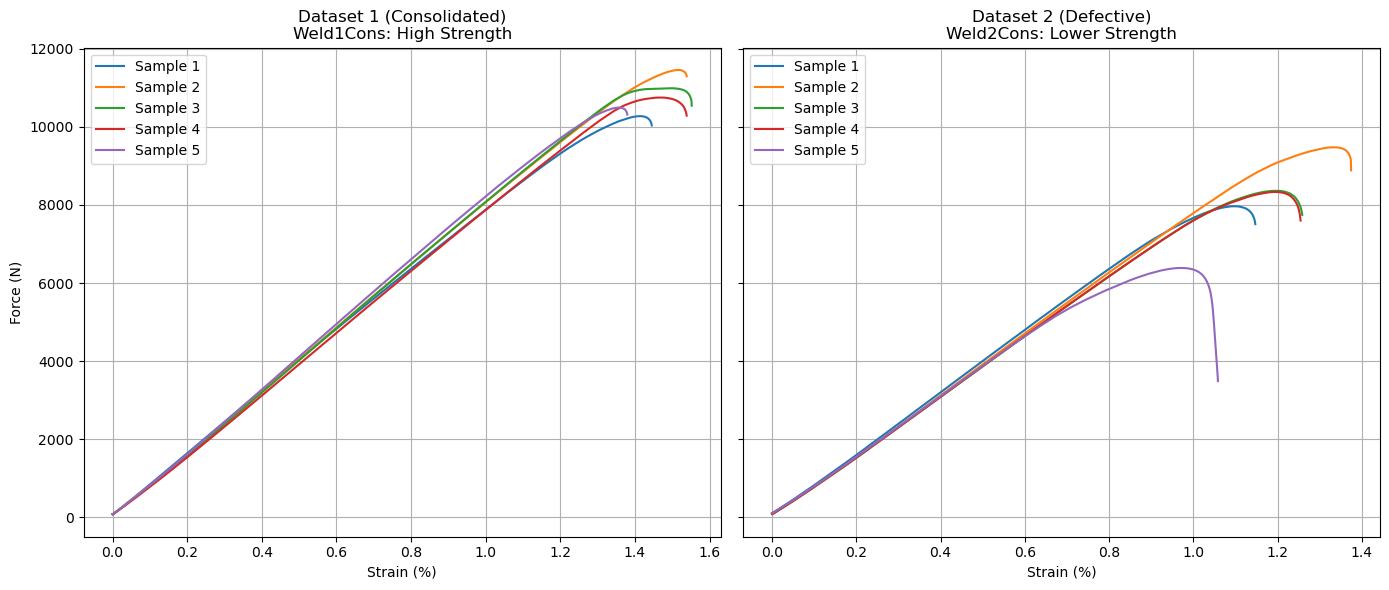

In [ ]:
base_dir = r"C:\Users\User\OneDrive - Delft University of Technology\Master Y1\Polymer Composite Manufacturing\Notebook 4 git\PCM-notebooks"

file_path_1 = os.path.join(base_dir, "Weld1Cons.xlsx")
file_path_2 = os.path.join(base_dir, "Weld2Cons.xlsx")

df1 = pd.read_excel(file_path_1, header=None)
df2 = pd.read_excel(file_path_2, header=None)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i in range(0, 10, 2):
    ax1.plot(df1[i], df1[i+1], label=f'Sample {i//2 + 1}')

ax1.set_title('Dataset 1 (Consolidated)\nWeld1Cons: High Strength')
ax1.set_xlabel('Strain (%)')
ax1.set_ylabel('Force (N)') 
ax1.legend()
ax1.grid(True)

for i in range(0, 10, 2):
    ax2.plot(df2[i], df2[i+1], label=f'Sample {i//2 + 1}')

ax2.set_title('Dataset 2 (Defective)\nWeld2Cons: Lower Strength')
ax2.set_xlabel('Strain (%)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

Comment: Based on the analysis of the provided datasets, the stress-strain behavior has been plotted below. Dataset 1 (Weld1Cons) is the consolidated sample. This dataset exhibits a higher peak force which is more than 10000 N and fails at a higher strain level generally more than 1.4%. The curves are consistent and show a cleaner transition to failure, indicating a strong bond. Dataset 2 (Weld2Cons) is the defective sample. This dataset shows a significantly lower peak force at less than 10000N and premature failure at lower strain levels less than 1.4%. This reduced strength is the direct result of the defects such voids or lack of fusion acting as stress concentrators and reducing the effective bonded area. Plot Analysis: The consolidated samples (Dataset 1) sustain load much longer, indicating a tough, ductile response where the weld holds until the bulk material or a large shear area yields. The defective samples (Dataset 2) fail abruptly at lower loads such as in sample 5, like that of brittle fracture where a crack propagates rapidly through the existing voids in the weak bond line.

#### Question 7.3: From your results of Q7.2, you should be able to derive that the elastic moduli are approximately similar for all samples. Explain why this is the case.

Answer: Despite the significant difference in failure load, the elastic modulus which is the slope of the initial linear portion of the curve is approximately similar for both the consolidated and defective samples. Modulus is a bulk property. In a Single Lap Shear test, the stiffness (slope) is still dominated by the bulk material properties of the composite plates and the overlap geometry. Since both samples use the same base composite material, their resistance to elastic deformation is identical. Defects affect the ultimate strength, not stiffness. The defects are localized at the interface. Even though they drastically reduce the maximum load the joint can carry before snapping, they do not significantly alter the overall stiffness of the assembly while it is still intact. The elastic moduli of the system remains effectively the same until the weak bond begins to fail.